# **Unsupervised Learning Practicle Implementation**

**1.Kmeans / Kmeans++  Clustering**

**2.Hierarchical Clustering**

**3.DBSCAN Clustering**


In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [3]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

In [4]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [6]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [7]:
kmeans.labels_

array([1, 2, 1, 0, 0, 0])

In [8]:
label=kmeans.labels_

In [9]:
np.array([[0, 0], [12, 3]])

array([[ 0,  0],
       [12,  3]])

In [10]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [11]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  1.],
       [ 1.,  4.]])

In [12]:
kmeans.inertia_

10.0

In [13]:
wcss=[]
for i in [2,3]:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(X,label)

0.43630092057240805

In [16]:
import pandas as pd
pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])



In [18]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

In [19]:
clustering = AgglomerativeClustering()


In [20]:
clustering.fit(X)


AgglomerativeClustering()

In [21]:
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [22]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [23]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




In [24]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")


In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
data=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [27]:
X=np.array(data)

In [28]:

X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [29]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0 ,   n_clusters=None , compute_distances=True , compute_full_tree=True)
model = model.fit(X)

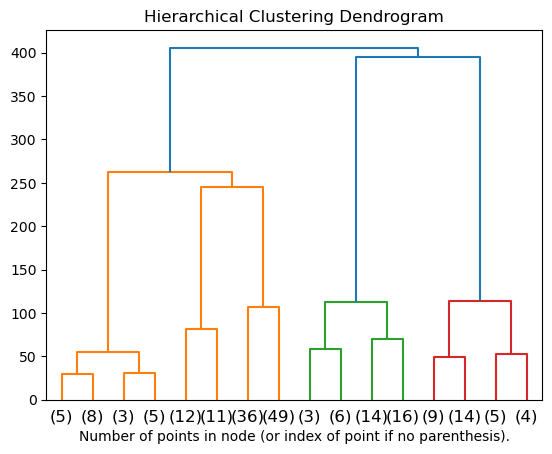

In [30]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [31]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
 


In [32]:
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


**Class Tasks**

*import Dataset Mall Customer*

**Use Annual income and Spending Score Column**

***q1. try  k= 3 , 4, 5 , 6, 7***

***q2. try wcss/inersia_***

***q3 .plot it and find optimal k value*** 

***q4 . evaluate using sihloutee Score and dunn index*** 

In [34]:
task = df   

In [35]:
task.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
data= task[["Annual Income (k$)","Spending Score (1-100)"]]

In [37]:
task.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
#ANS:
def plot_wcss_Silhoutee(data):
    wcss=[]
    silh_score=[]
    for k in [3,4,5,6,7]:
        k_means= KMeans(n_clusters=k , init="k-means++" , random_state=42)
        data= k_means.fit(data)
        wcss.append(data)
        score =silhouette_score(data , k_means.labels_)
        silh_score.append(score)
    #now ploting wcss and silhouetee score , findind Optimal value   
    fig ,(ax1,ax2) = plt.subplots()
    #ploting wcss
    ax1.plot([3,4,5,6,7] , wcss , marker="o" , color = "tab:green" , label ="WCSS")
    ax1.set_xlabel("Number of Value (K)" , color="tab:green")
    ax1.set_ylabel("WCSS(Inersia)", color ="tab:green")
    ax1.tick_params(axis='y', labelcolor='tab:green')
    #ploting silhouetee score  
    ax2.plot([3,4,5,6,7] , silh_score , marker="o" ,  color = "tab:blue" , lable ="Silhouetee Score")
    ax2.set_ylabel('Silhouette Score', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    plt.title("WCSS and Silhouette Score vs Number of Clusters (K)")
    plt.tight_layout()
    plt.show()
    

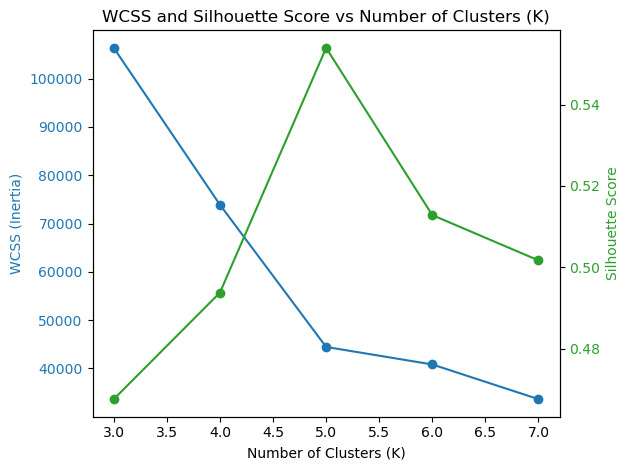

In [89]:
plot_wcss_silhouette(data)

In [91]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

def dunn_index(X, labels):
    # Calculate pairwise distance matrix
    distances = pairwise_distances(X)
    
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)
    
    intra_cluster_distances = []
    inter_cluster_distances = []
    
    # Calculate intra-cluster distances (max distance within each cluster)
    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            intra_cluster_dist = np.max(pairwise_distances(cluster_points))
            intra_cluster_distances.append(intra_cluster_dist)
    
    # Calculate inter-cluster distances (min distance between any two clusters)
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            cluster_i_points = X[labels == unique_labels[i]]
            cluster_j_points = X[labels == unique_labels[j]]
            inter_cluster_dist = np.min(pairwise_distances(cluster_i_points, cluster_j_points))
            inter_cluster_distances.append(inter_cluster_dist)
    
    # Dunn Index = Min inter-cluster distance / Max intra-cluster distance
    dunn_index_value = np.min(inter_cluster_distances) / np.max(intra_cluster_distances)
    
    return dunn_index_value

# Example usage:
# Fit KMeans model and compute Dunn Index
def compute_dunn_plot(data):
    dunn_scores = []
    for k in [3,4,5,6,7]:
        k_means = KMeans(n_clusters=k, random_state=42)
        k_means.fit(data)
        labels = k_means.labels_
        dunn_score = dunn_index(data, labels)
        dunn_scores.append(dunn_score)
    
    # Plotting Dunn Index
    plt.plot([3,4,5,6,7] ,dunn_scores, marker='o', color='tab:red')
    plt.title('Dunn Index vs Number of Clusters (K)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Dunn Index')
    plt.grid(True)
    plt.show()




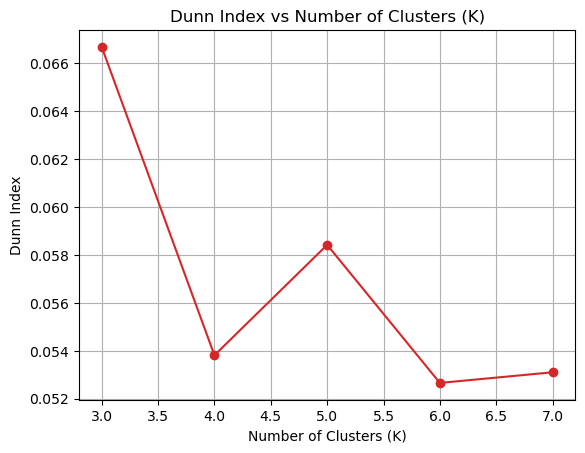

In [93]:
compute_dunn_plot(data)